In [27]:
# Importing required libraries
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

'tf'

In [28]:
#Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [29]:
# Loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
X_train.shape[1:]

(32, 32, 3)

In [31]:
#normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test

In [32]:
#One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [33]:
#Create a model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))     

In [34]:
#compile the model
epochs = 2
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [35]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)              

In [36]:
#Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 270s 5ms/step - loss: 1.7715 - accuracy: 0.3636 - val_loss: 1.5188 - val_accuracy: 0.4640
Epoch 2/2
50000/50000 [==============================] - 298s 6ms/step - loss: 1.5026 - accuracy: 0.4620 - val_loss: 1.4068 - val_accuracy: 0.5078


In [37]:
#Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.78%


In [38]:
#Performance change
m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))

In [39]:
epochs = 2
lrate = 0.01
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [40]:
print(m1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [41]:
history = m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 321s 6ms/step - loss: 3.6613 - accuracy: 0.1004 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/2
50000/50000 [==============================] - 314s 6ms/step - loss: 2.3033 - accuracy: 0.1006 - val_loss: 2.3032 - val_accuracy: 0.1000


In [42]:
scores = m1.evaluate(X_test, y_test, verbose=1)
print('Test  loss:', scores[0])
print('Test  accuracy:', scores[1])
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 16s 2ms/step
Test  loss: 2.303168586730957
Test  accuracy: 0.10000000149011612
Accuracy: 10.00%


In [43]:
y=model.predict_classes(X_train[[1],:])
print(y[0])

8


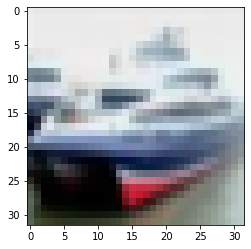

actual [8] predicted 1


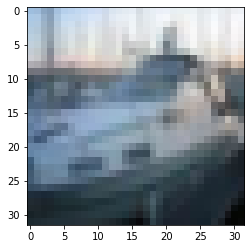

actual [8] predicted 8


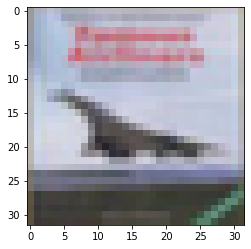

actual [0] predicted 8


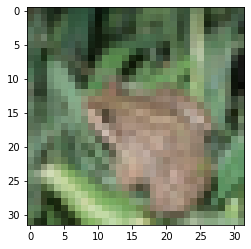

actual [6] predicted 4


In [44]:
#predicting the first four images of the dataset
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])

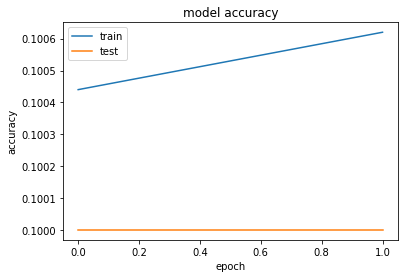

In [45]:
#plotting the graph for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

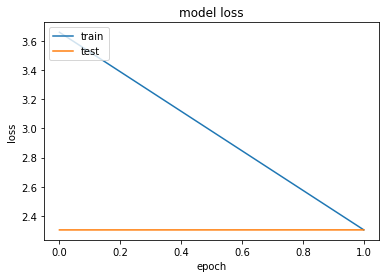

In [46]:
#plotting graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
#saving the model in the format of .h5
m1.save("my_model.h5")

In [48]:
#reading the saved format data
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('my_model.h5')

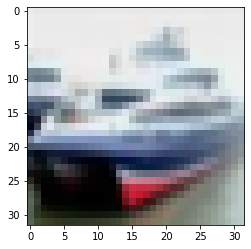

actual [8] predicted 8


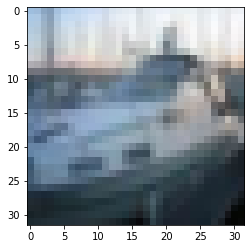

actual [8] predicted 8


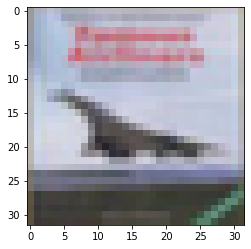

actual [0] predicted 8


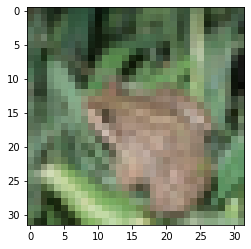

actual [6] predicted 8


In [26]:
#Bonus Question
#New model has the model data saved in h5 format

#predicting the first four images of the h5 model
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=new_model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])